#Dynamic Hamiltonian Solver

The goal of this notebook is to simulate the Von Neumann equation for an arbitrary hamiltonian and return a final densisty matrix, 
\begin{align*}
    i \hbar \frac{d\rho}{dt} =[H,\rho]
\end{align*}


We will transform the Hamiltonian to the rotating frame first, let
$$U = e^{-iH_0 t}$$
and thus 
$$H_{int} = UH'U^{\dagger}$$
and the density matrix is redefined as
$$\rho_I = U\rho U^{\dagger}$$
and we apply the inverse relation 
$$\rho = U^{\dagger}\rho_I U$$

We need to account for the decay of the excited state so we then apply the Linblad equation
\begin{align*}
    \frac{d\rho}{dt} = \frac{-i}{\hbar} [H,\rho]+\sum_i  -\frac{1}{2} \left(L_i^{\dagger}L_i\rho +\rho L_i^{\dagger}L_i \right) + L_i\rho L_i^{\dagger}
\end{align*}

rabi 3.876949748108142e-05


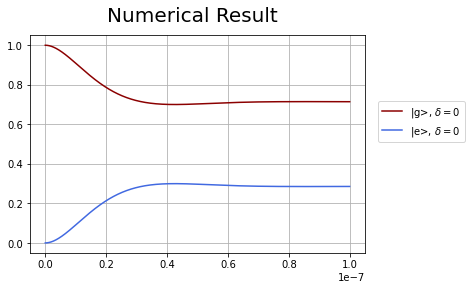

0.0
0.3105299472808838
0.16217780113220215
steps 1.0E+04


In [9]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline


###
def Euler(rho,L,Ld,t):
    temp = np.cos(wl*t)
    for i in range(1,len(t)):
        H=Ham(t[i-1],temp[i-1])
        H = np.matmul(np.matmul(Uni(t[i-1]),H), Unic(t[i-1]))
        rho[i] = rho[i-1]+del_t*(-1j*(np.matmul(H,rho[i-1])-np.matmul(rho[i-1],H)) \
                       -.5*(np.matmul(Ld,np.matmul(L,rho[i-1])) + np.matmul(rho[i-1], np.matmul(Ld,L))) + np.matmul(L,np.matmul(rho[i-1], Ld)))                                
    return(rho)

### Two Level Atom ###                                
t0=time.time()                        
#create a list of times to simulate                                
del_t = 1e-11
t = np.arange(0,1e-7,del_t)           

#create empty density matrix list and initial state
n=2 ## dimension of Hamiltonian
rho = np.zeros((len(t),n,n),dtype=complex)
rho[0] = [[1,0],[0,0]] # initial conditions


##create Hamiltonian, in this example we have 2 level system with coupling electric field

w0 = 2*np.pi*607e12 



gam=2*np.pi*15.1e6

## given beam parameters get a rabi freq W
I = 2*2.2e-6/(np.pi*(80e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam*3*sc.c**2/(4*a*w0**3))
W= E/sc.hbar*mu/2 ##Rabi Frequency
#gam=0
print('rabi', W/1e12)

d=0 ##detuning
wl = w0-d

H_0 = np.zeros((n,n), dtype= complex)
H_1 = np.zeros((n,n), dtype= complex)
U = np.zeros((n,n), dtype=complex)
Uc = np.zeros((n,n), dtype=complex)
L = np.zeros((n,n), dtype=complex)
Ld = np.zeros((n,n), dtype=complex)
L[0,1] = np.sqrt(gam)
Ld[1,0] = np.sqrt(gam)

H_0[1,1] =  w0

def Ham(t,c):
    H_1[1,0] = H_1[0,1] = W*c
    return H_1

def Uni(t):
    for i in range(n):
        U[i,i] = np.exp(-1j*H_0[i,i]*t)
    return U

def Unic(t):
    for i in range(n):
        Uc[i,i] = np.exp(1j*H_0[i,i]*t)
    return Uc

                                                                           
t1=time.time()
result = Euler(rho,L,Ld,t)
t2=time.time()

##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()

d2=0
Wp2= math.sqrt(W**2+d2**2)
plt.plot(t,result[:,0,0].real, color = 'darkred',label="|g>, $\delta = 0$ ")#
plt.plot(t,result[:,1,1].real, color = 'royalblue',label="|e>, $\delta = 0$ ")

# plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t3=time.time()
print(t1-t0)
print(t2-t1)
print(t3-t2)
print('steps', format(len(t),'.1E'))


In [7]:
### 3 Level System ####
###simulation of shelving with 455
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline



def Euler(rho,L,Ld,t):
    temp = np.cos(wl_1*t)
    temp2 = np.cos(wl_2*t)
    for i in range(1,len(t)):
        H=Ham(t[i-1],temp[i-1],temp2[i-1])
        H = np.dot(np.dot(Uni(t[i-1]),H), Unic(t[i-1]))
        rho[i] = rho[i-1]+del_t*(-1j*(np.dot(H,rho[i-1])-np.dot(rho[i-1],H)) \
                       -.5*(np.dot(Ld,np.dot(L,rho[i-1])) + np.dot(rho[i-1], np.dot(Ld,L))) + np.dot(L,np.dot(rho[i-1], Ld)))                                
    return(rho)

### Two Level Atom ###                                
#create a list of times to simulate                                
del_t = 1e-11
t = np.arange(0,1e-7,del_t)           


In [8]:
t0=time.time()                        

#create empty density matrix list and initial state
n=3 ## dimension of Hamiltonian
rho = np.zeros((len(t),n,n),dtype=complex)
rho[0] = [[1,0,0],[0,0,0],[0,0,0]] # initial conditions


##create Hamiltonian, in this example we have 2 level system with coupling electric field

w_1 = 2*np.pi*607e12
d_1=0 ##detuning
wl_1 = w_1-d_1
w_2 = 2*np.pi*461e12
d_2 = 0
wl_2 = w_2-d_2

gam_1=2*np.pi*15.1e6

## given beam parameters get a rabi freq W
I = 2*1e-5/(np.pi*(80e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_1*3*sc.c**2/(4*a*w_1**3))
W_1 = E/sc.hbar*mu/2 ##Rabi Frequency

gam_2=2*np.pi*4.9e6

## given beam parameters get a rabi freq W
I = 2*.0005/(np.pi*(200e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_2*3*sc.c**2/(4*a*w_2**3))
W_2 = E/sc.hbar*mu/2 ##Rabi Frequency


H_0 = np.zeros((n,n), dtype= complex)
H_1 = np.zeros((n,n), dtype= complex)
U = np.zeros((n,n), dtype=complex)
Uc = np.zeros((n,n), dtype=complex)
L = np.zeros((n,n), dtype=complex)
Ld = np.zeros((n,n), dtype=complex)
L[2,0] = np.sqrt(gam_1)
Ld[0,2] = np.sqrt(gam_1)
L[1,0] = np.sqrt(gam_2)
Ld[0,1] = np.sqrt(gam_2)

H_0[1,1] = w_2
H_0[2,2] =  w_1


def Ham(t,c,c2):
    H_1[2,0] = H_1[0,2] = W_1*c
    H_1[1,0] = H_1[1,0] = W_2*c2
    return H_1

def Uni(t):
    for i in range(n):
        U[i,i] = np.exp(-1j*H_0[i,i]*t)
    return U

def Unic(t):
    for i in range(n):
        Uc[i,i] = np.exp(1j*H_0[i,i]*t)
    return Uc

                                                                           
t1=time.time()
result = Euler(rho,L,Ld,t)
t2=time.time()

##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()


plt.plot(t,result[:,0,0].real, color = 'darkred',label="|g>, $\delta = 0$ ")#
plt.plot(t,result[:,2,2].real, color = 'royalblue',label="|e>, $\delta = 0$ ")
plt.plot(t,result[:,1,1].real, color = 'green',label="|m>, $\delta = 0$ ")

# plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t3=time.time()
print(t1-t0)
print(t2-t1)
print(t3-t2)

print('total time', t3-t0)


IndexError: index 3 is out of bounds for axis 0 with size 3

In [9]:
### 3 Level System ####

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline



def Euler(rho,L,Ld,LL,t):
    t_cos = np.arange(0,2*np.pi/wl_1,.1/wl_1)    
    temp = np.cos(wl_1*t_cos)
    t_cos_2 = np.arange(0,2*np.pi/wl_2,.1/wl_2)    
    temp_2 = np.cos(wl_2*t_cos_2)
    rho_old = rho[0]
    rho_new = rho[0]
    t_loop = del_t
    for i in range(1,int(len(t)*mult)):
        H=Ham(t_loop,temp[int((len(t_cos))*(wl_1/(2*np.pi))*( ((i-1)*del_t) % (2*np.pi/wl_1) ))], \
            temp_2[int((len(t_cos_2))*(wl_2/(2*np.pi))*( ((i-1)*del_t) % (2*np.pi/wl_2) ))] )
        H = np.dot(np.dot(Uni(t_loop),H), Unic(t_loop))
        rho_new = rho_old+del_t*(-1j*(np.dot(H,rho_old)-np.dot(rho_old,H)) \
                       -.5*(np.dot(Ld,np.dot(L,rho_old)) + np.dot(rho_old, LL)) + np.dot(L,np.dot(rho_old, Ld)))
        if i % mult == 0:
            rho[int(i/mult)] = rho_new
        rho_old = rho_new
        t_loop = t_loop+del_t        
    return(rho)

### Two Level Atom ###                                
#create a list of times to simulate                                
del_t = 1e-12
mult = 1e2
t = np.arange(0,1e-7,del_t*mult)

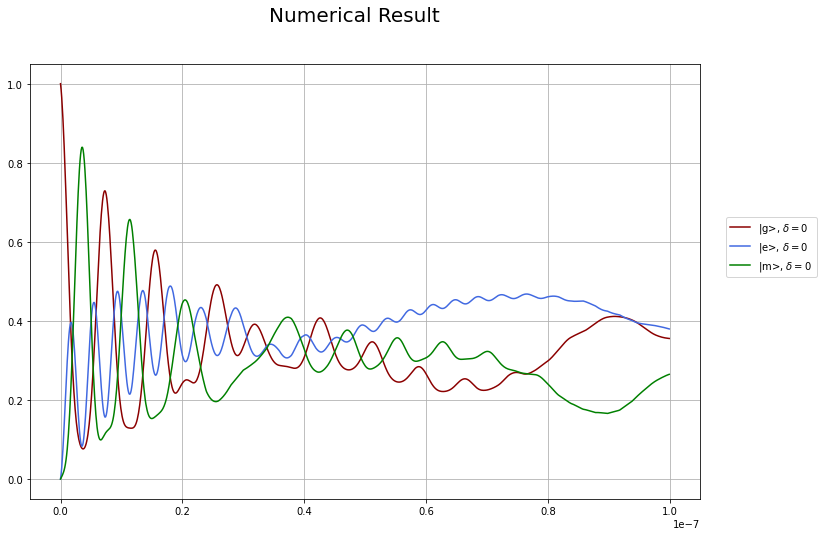

0.0009970664978027344
2.970083713531494
0.19647574424743652
steps 1.0E+05
total time 3.1675565242767334


In [10]:
t0=time.time()                        

#create empty density matrix list and initial state
n=3 ## dimension of Hamiltonian
rho = np.zeros((len(t),n,n),dtype=complex)
rho[0] = [[1,0,0],[0,0,0],[0,0,0]] # initial conditions


##create Hamiltonian, in this example we have 2 level system with coupling electric field

w_1 = 2*np.pi * 607e12
d_1=0 ##detuning
wl_1 = w_1-d_1
w_2 = 2*np.pi * (607-461)*1e12
d_2 = 50e6
wl_2 = 2*np.pi*461e12-d_2

gam_1=2*np.pi*15.1e6

## given beam parameters get a rabi freq W
I = 2*.0001/(np.pi*(80e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_1*3*sc.c**2/(4*a*w_1**3))
W_1 = E/sc.hbar*mu ##Rabi Frequency

gam_2=2*np.pi*4.9e6

## given beam parameters get a rabi freq W
I = 2*.0001/(np.pi*(300e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_2*3*sc.c**2/(4*a*w_2**3))
W_2 = E/sc.hbar*mu ##Rabi Frequency


H_0 = np.zeros((n,n), dtype= complex)
H_1 = np.zeros((n,n), dtype= complex)
U = np.zeros((n,n), dtype=complex)
Uc = np.zeros((n,n), dtype=complex)
L = np.zeros((n,n), dtype=complex)
Ld = np.zeros((n,n), dtype=complex)
L[2,0] = np.sqrt(gam_1)
Ld[0,2] = np.sqrt(gam_1)
L[1,0] = np.sqrt(gam_2)
Ld[0,1] = np.sqrt(gam_2)
LL = np.matmul(Ld,L)
H_0[1,1] = w_2
H_0[2,2] =  w_1


def Ham(t,c,c_2):
    H_1[2,0] = H_1[0,2] = W_1*c
    H_1[2,1] = H_1[1,2] = W_2*c_2
    return H_1

def Uni(t):
    for i in range(n):
        U[i,i] = np.exp(-1j*H_0[i,i]*t)
    return U

def Unic(t):
    for i in range(n):
        Uc[i,i] = np.exp(1j*H_0[i,i]*t)
    return Uc

                                                                           
t1=time.time()
result = Euler(rho,L,Ld,LL,t)
t2=time.time()

##Plotting Results###
plt.rcParams['figure.figsize'] = [12, 8]
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()


plt.plot(t,result[:,0,0].real, color = 'darkred',label="|g>, $\delta = 0$ ")#
plt.plot(t,result[:,2,2].real, color = 'royalblue',label="|e>, $\delta = 0$ ")
plt.plot(t,result[:,1,1].real, color = 'green',label="|m>, $\delta = 0$ ")

# plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t3=time.time()
print(t1-t0)
print(t2-t1)
print(t3-t2)
print('steps', format(len(t)*mult,'.1E'))

print('total time', t3-t0)

In [12]:
###figuring out the cosine bit and only needing one period saved

del_t = 1e-16
t = np.arange(0,1e-13,del_t)    
t_cos = np.arange(0,2*np.pi/wl_1,.1/wl_1)    
temp = np.cos(wl_1*t_cos)

rho_old = rho[0]
rho_new = rho[0]
t_loop = del_t
for i in range(1,int(len(t)*mult)):
    H=Ham(t_loop,temp[int((i-1) % len(t_cos))])
        
        
        ##Plotting Results###
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()

print(1/wl_1)
print(del_t)
plt.plot(t_cos, temp)#

plt.grid()
plt.show()

print(t_cos)

TypeError: Ham() missing 1 required positional argument: 'c_2'

In [13]:
##5 Levels##

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import math
import cmath
import scipy.constants as sc
import time
%matplotlib inline



def Euler(rho,L,Ld,LL,t):
    t_cos = np.arange(0,2*np.pi/wl_1,.1/wl_1)    
    temp = np.cos(wl_1*t_cos)
    t_cos_2 = np.arange(0,2*np.pi/wl_2,.1/wl_2)    
    temp_2 = np.cos(wl_2*t_cos_2)
    rho_old = rho[0]
    rho_new = rho[0]
    t_loop = del_t
    for i in range(1,int(len(t)*mult)):
        H=Ham(t_loop,temp[int((len(t_cos))*(wl_1/(2*np.pi))*( ((i-1)*del_t) % (2*np.pi/wl_1) ))], \
            temp_2[int((len(t_cos_2))*(wl_2/(2*np.pi))*( ((i-1)*del_t) % (2*np.pi/wl_2) ))] )
        H = np.dot(np.dot(Uni(t_loop),H), Unic(t_loop))
        rho_new = rho_old+del_t*(-1j*(np.dot(H,rho_old)-np.dot(rho_old,H)) \
                       -.5*(np.dot(Ld,np.dot(L,rho_old)) + np.dot(rho_old, LL)) + np.dot(L,np.dot(rho_old, Ld)))
        if i % mult == 0:
            rho[int(i/mult)] = rho_new
        rho_old = rho_new
        t_loop = t_loop+del_t        
    return(rho)

                                
del_t = 1e-12
mult = 1e2
t = np.arange(0,1e-7,del_t*mult)



t0=time.time()                        

#create empty density matrix list and initial state
n=3 ## dimension of Hamiltonian
rho = np.zeros((len(t),n,n),dtype=complex)
rho[0,0,0] = 1.0 # initial conditions


In [14]:
##create Hamiltonian, in this example we have 2 level system with coupling electric field

w_p12 = 2*np.pi * 607e12
w_p32 = 2*np.pi * 658e12
w_d32 = 2*np.pi * (607-461)*1e12
w_d52 = 2*np.pi * (658-487)*1e12
w_g = 563e12
wl_p12 = w_p12-w_g
wl_p32 = w_p132-w_g
wl_d32 = 461e12-w_g
wl_d52 = 487e12-w_g


gam_1=2*np.pi*15.1e6

## given beam parameters get a rabi freq W
I = 2*.0001/(np.pi*(80e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_1*3*sc.c**2/(4*a*w_1**3))
W_1 = E/sc.hbar*mu ##Rabi Frequency

gam_2=2*np.pi*4.9e6

## given beam parameters get a rabi freq W
I = 2*.0001/(np.pi*(300e-6)**2)
E = np.sqrt(2*I/(sc.c*sc.epsilon_0))
a = 1/(4*np.pi*sc.epsilon_0*sc.hbar*sc.c)
mu = np.sqrt(gam_2*3*sc.c**2/(4*a*w_2**3))
W_2 = E/sc.hbar*mu ##Rabi Frequency


H_0 = np.zeros((n,n), dtype= complex)
H_1 = np.zeros((n,n), dtype= complex)
U = np.zeros((n,n), dtype=complex)
Uc = np.zeros((n,n), dtype=complex)
L = np.zeros((n,n), dtype=complex)
Ld = np.zeros((n,n), dtype=complex)
L[2,0] = np.sqrt(gam_1)
Ld[0,2] = np.sqrt(gam_1)
L[1,0] = np.sqrt(gam_2)
Ld[0,1] = np.sqrt(gam_2)
LL = np.matmul(Ld,L)
H_0[1,1] = w_2
H_0[2,2] =  w_1


def Ham(t,c,c_2):
    H_1[2,0] = H_1[0,2] = W_1*c
    H_1[2,1] = H_1[1,2] = W_2*c_2
    return H_1

def Uni(t):
    for i in range(n):
        U[i,i] = np.exp(-1j*H_0[i,i]*t)
    return U

def Unic(t):
    for i in range(n):
        Uc[i,i] = np.exp(1j*H_0[i,i]*t)
    return Uc

                                                                           
t1=time.time()
result = Euler(rho,L,Ld,LL,t)
t2=time.time()

##Plotting Results###
plt.rcParams['figure.figsize'] = [12, 8]
fig = plt.figure()
fig.suptitle('Numerical Result', fontsize=20)
ax = fig.gca()


plt.plot(t,result[:,0,0].real, color = 'darkred',label="|g>, $\delta = 0$ ")#
plt.plot(t,result[:,2,2].real, color = 'royalblue',label="|e>, $\delta = 0$ ")
plt.plot(t,result[:,1,1].real, color = 'green',label="|m>, $\delta = 0$ ")

# plt.plot(t, (np.cos(Wp2*t/2))**2+(d2/Wp2)**2*(np.sin(Wp2*t/2))**2, color = 'royalblue',label="|g>, $\delta = 0$ ")
plt.legend(loc=(1.04,.51))
plt.grid()
plt.show()

t3=time.time()
print(t1-t0)
print(t2-t1)
print(t3-t2)
print('steps', format(len(t)*mult,'.1E'))

print('total time', t3-t0)

NameError: name 'w_p132' is not defined